# Medical School Graduates
Data downloaded from https://www.kff.org/other/state-indicator/distribution-by-race-ethnicity/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

In [1]:
import pandas as pd
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta
import time
import seaborn as sns
from pylab import rcParams
sns.set(style='whitegrid',palette='husl')
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

# Load Data, Clean, and Add Percentages

In [2]:
df_2014=pd.read_csv('2014_med_grads.csv')
df_2015=pd.read_csv('2015_med_grads.csv')
df_2016=pd.read_csv('2016_med_grads.csv')
df_2017=pd.read_csv('2017_med_grads.csv')
df_2018=pd.read_csv('2018_med_grads.csv')

In [3]:
df=df_2014[:1]
df=df.append(df_2015[:1])
df=df.append(df_2016[:1])
df=df.append(df_2017[:1])
df=df.append(df_2018[:1])
df.index=range(2014, 2019, 1)

In [4]:
df=df.drop(columns=['Location','Footnotes'])

In [5]:
df.columns

Index(['White', 'Black', 'Asian', 'Hispanic', 'American Indian/ Alaska Native',
       'Native Hawaiian/ Pacific Islander', 'Other',
       'Multiple Race/ Ethnicity', 'Non-U.S. Citizen/Non-Permanent Resident',
       'Unknown Race/ Ethnicity', 'Total'],
      dtype='object')

In [6]:
#adding percentage column
for c in list(df.columns[:-1]):
    df[f'{c}_pct']=df[c]/df['Total']*100

In [7]:
#just making a percentage by year dataframe

In [8]:
df_race=df[[c for c in df.columns if 'pct' in c]]

In [9]:
df_race['year'] = df_race.index
df_race['year']= df_race['year'].astype(int)

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Visualizing

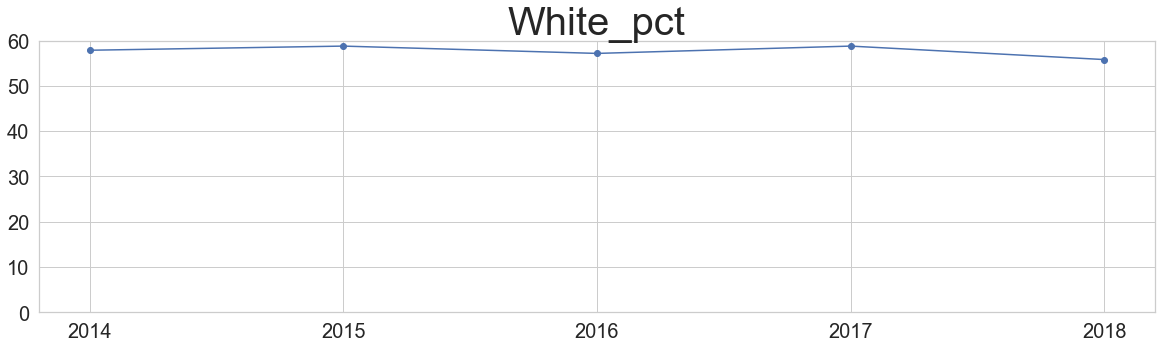

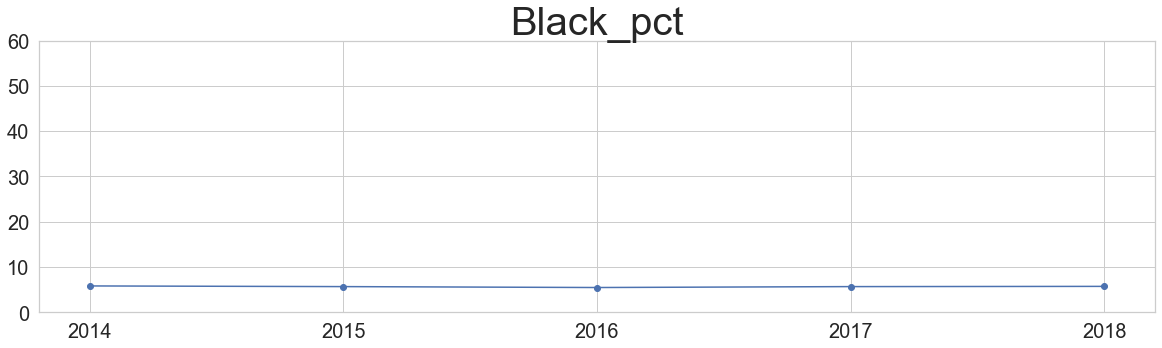

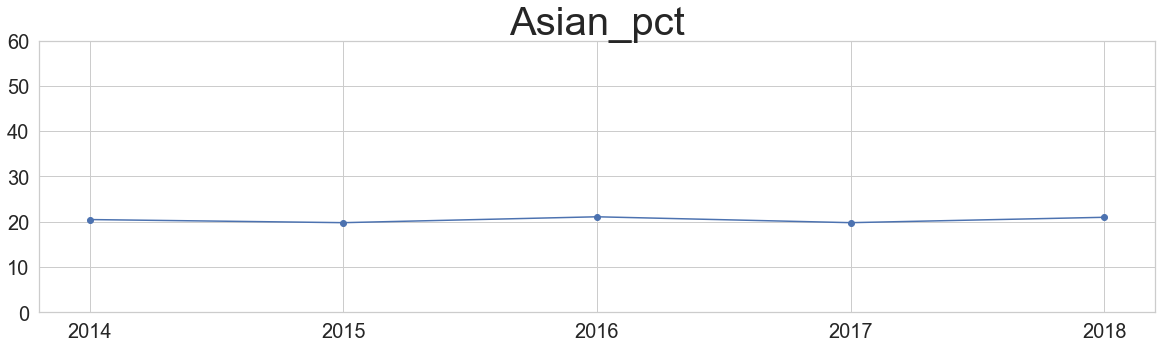

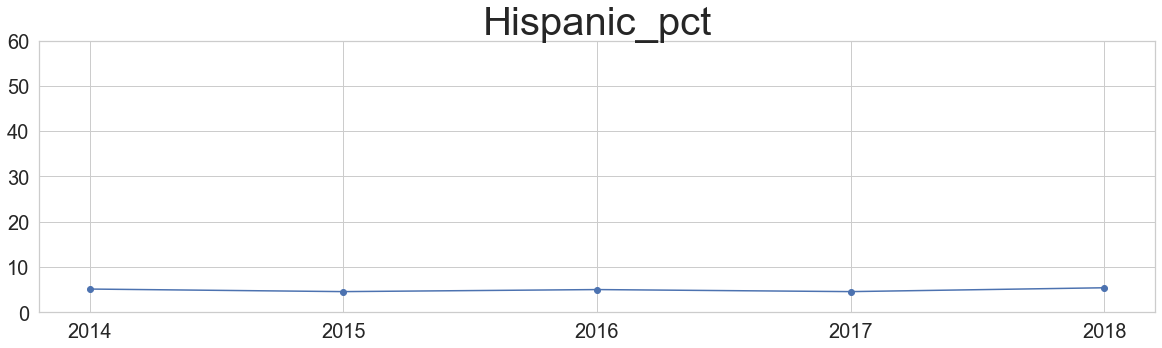

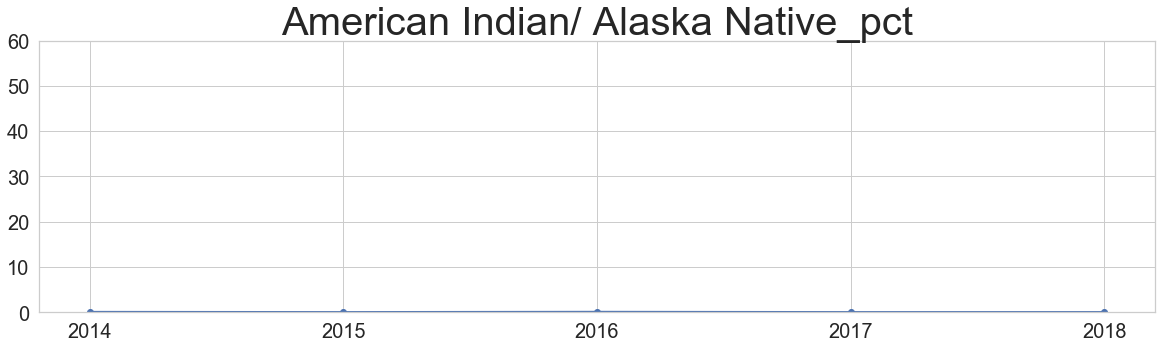

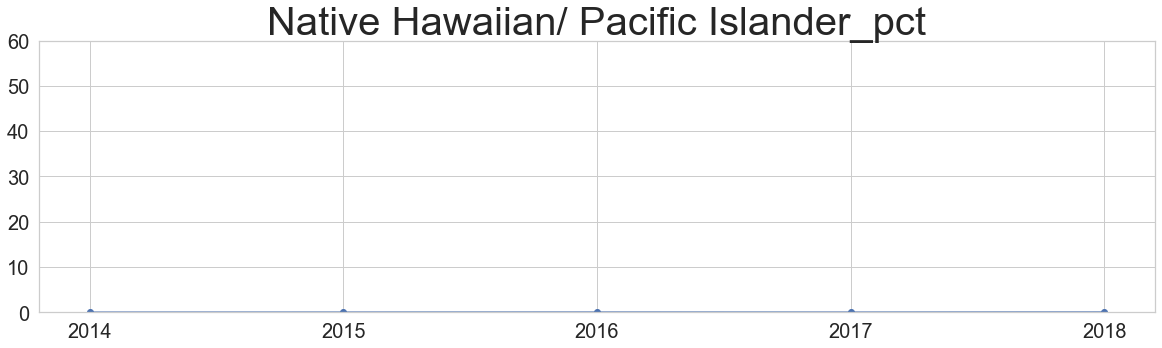

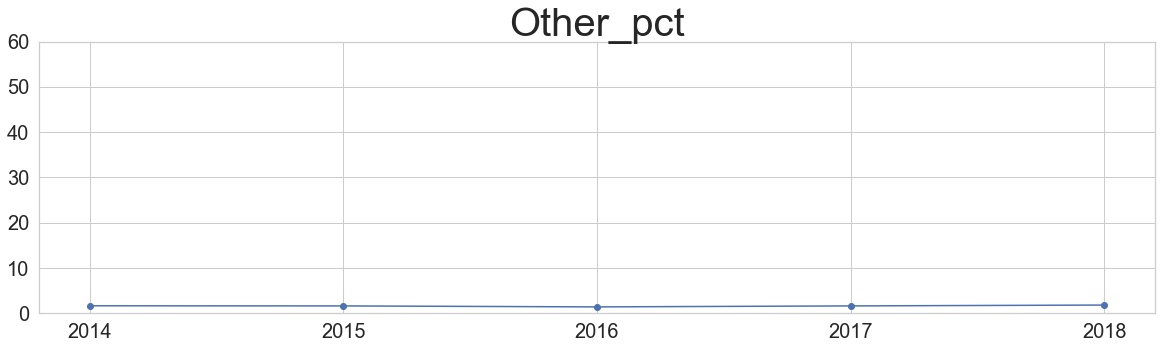

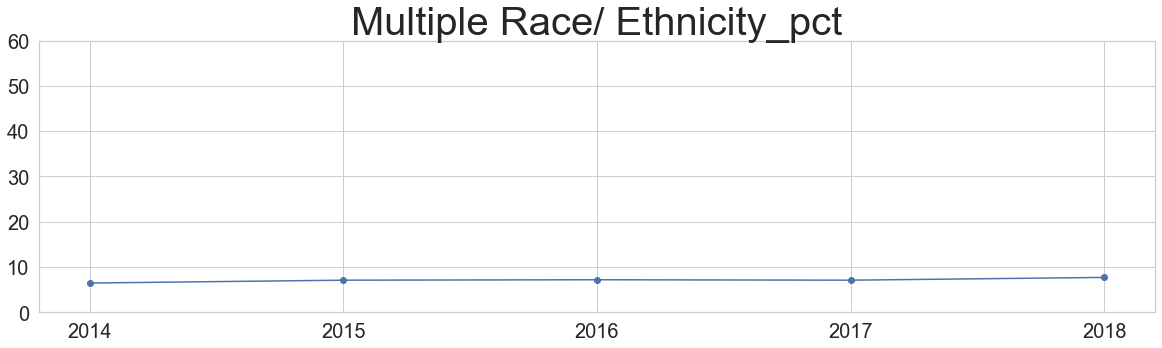

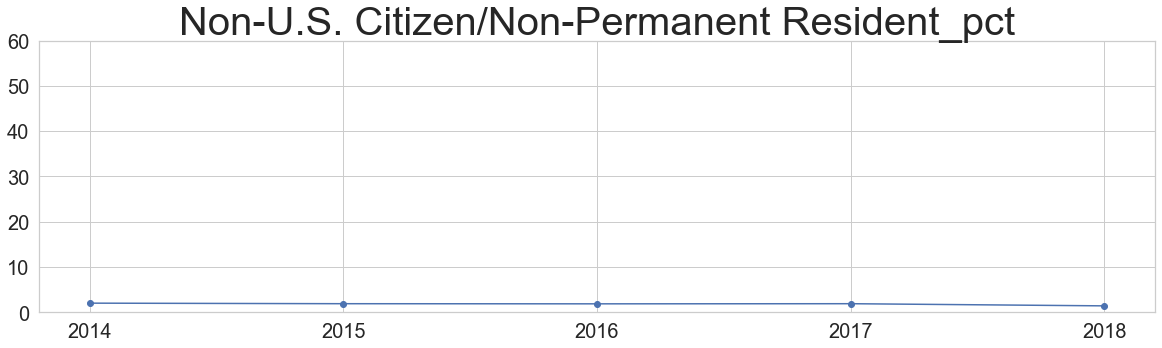

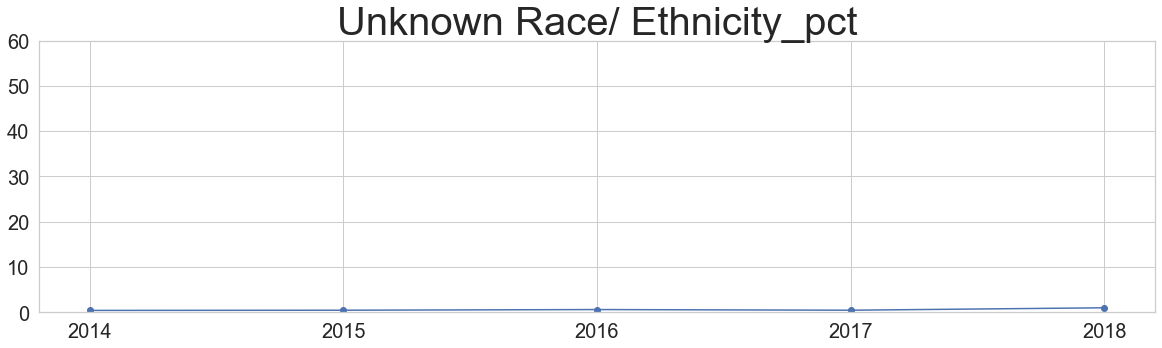

In [35]:
rcParams['figure.figsize'] = 20, 5

for c in df_race.columns[:-1]:
    plt.figure()
    plt.plot('year', c, data=df_race,marker='o')
    plt.xticks(df_race['year'].values)
    plt.yticks(range(0,70,10))
    plt.title(c,{'fontsize': 40,'fontweight' : 1}
    plt.tick_params(labelsize=20)

    

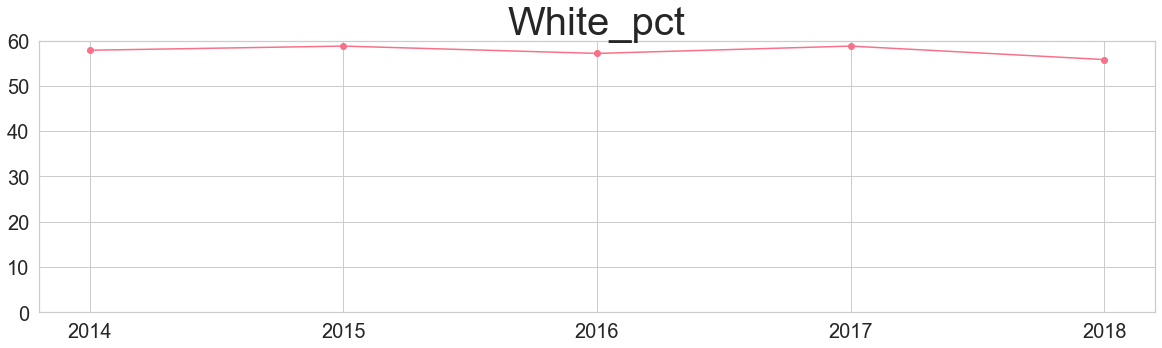

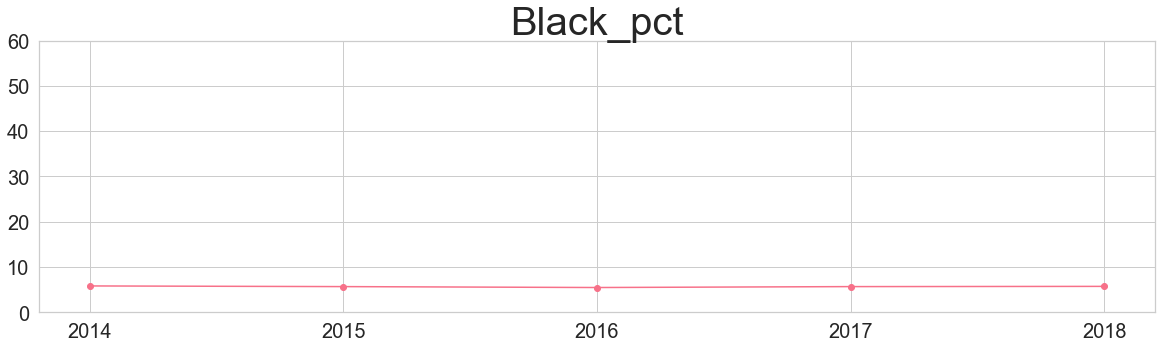

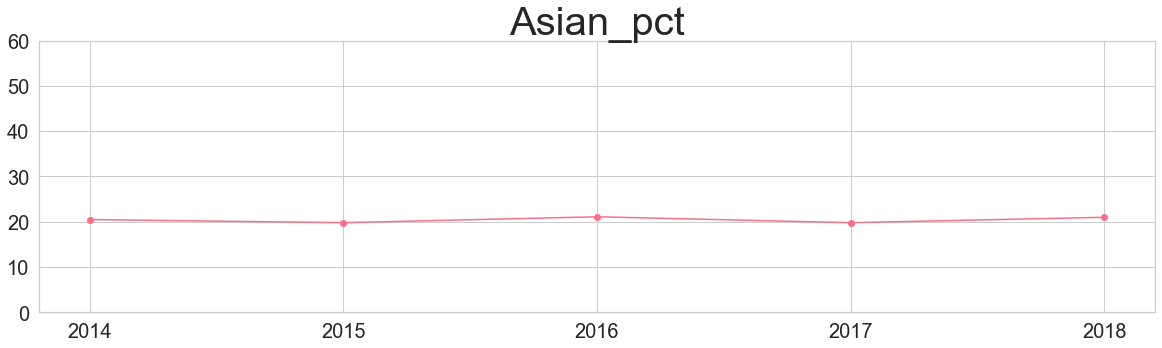

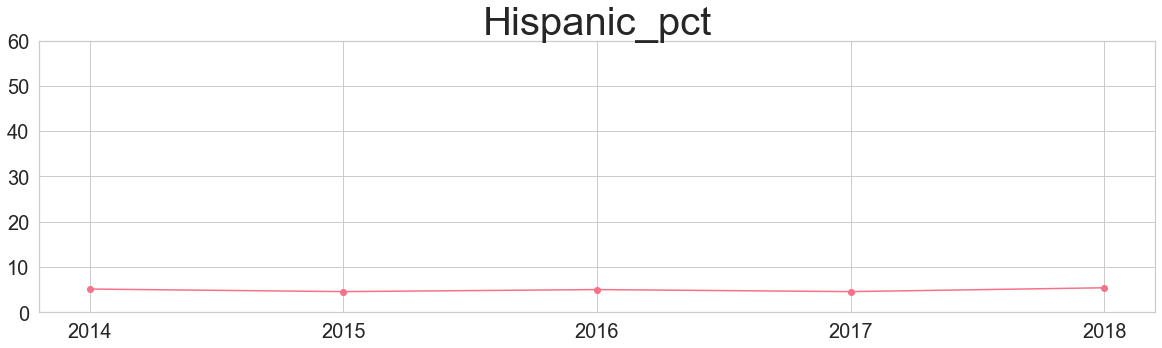

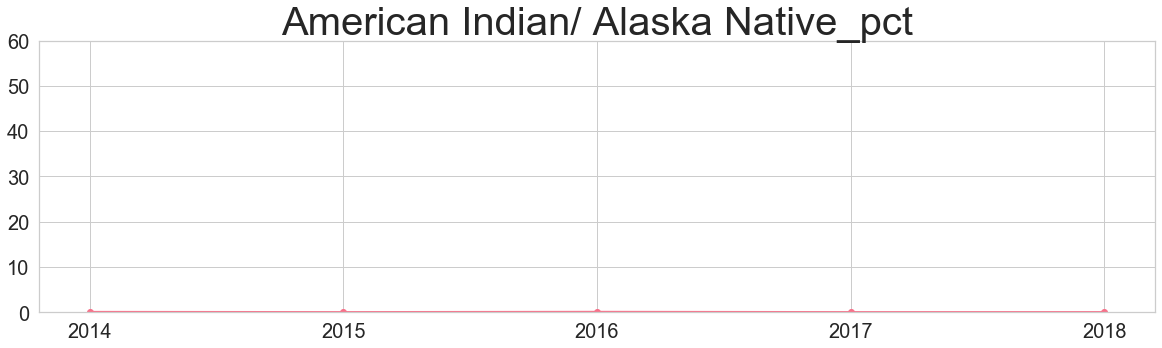

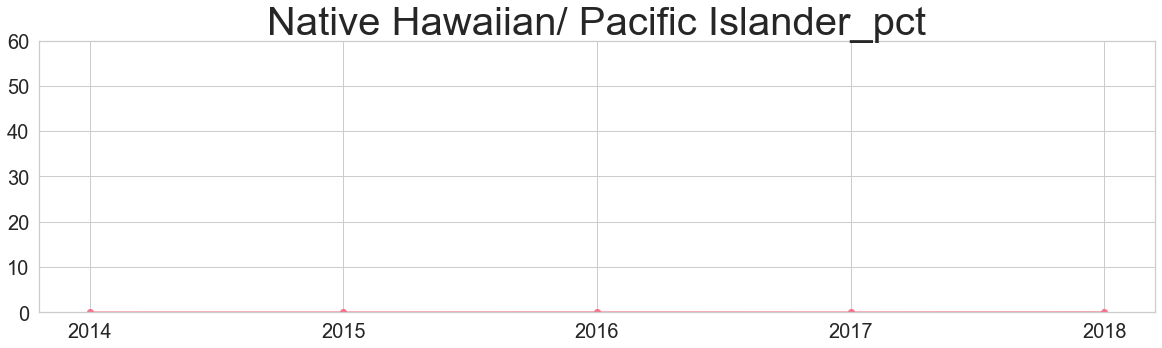

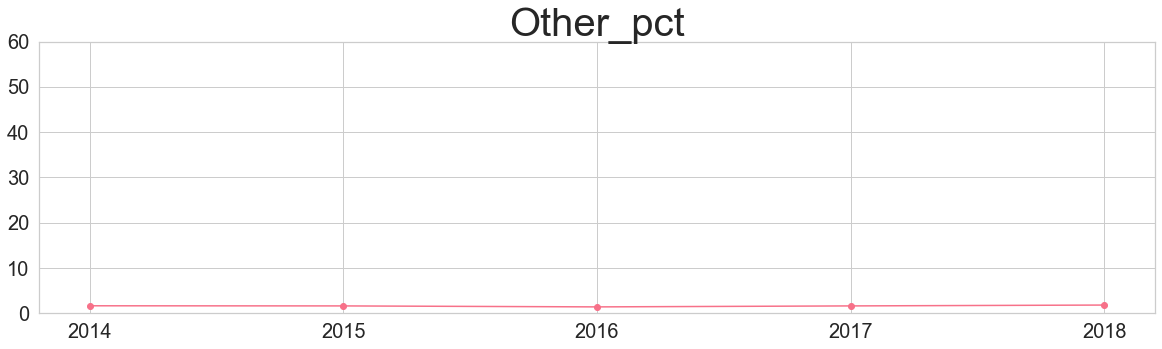

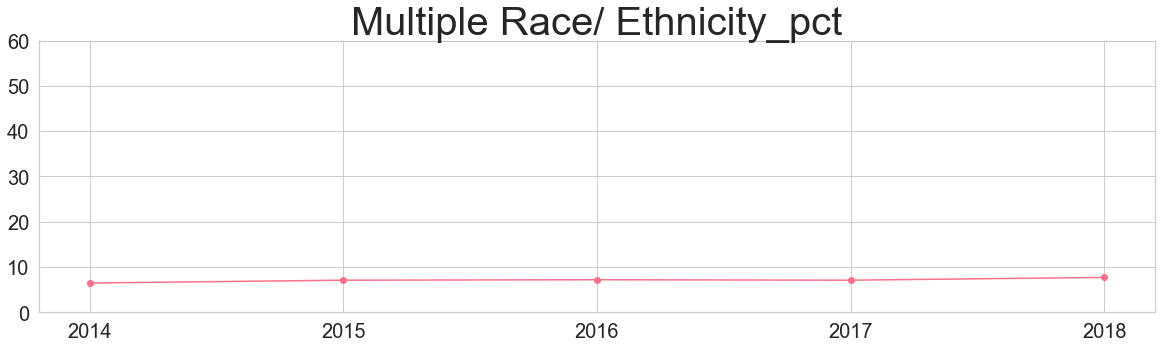

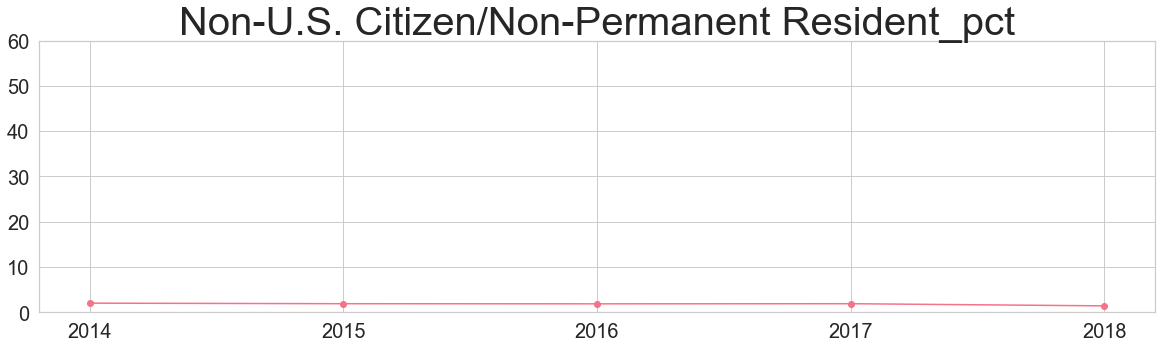

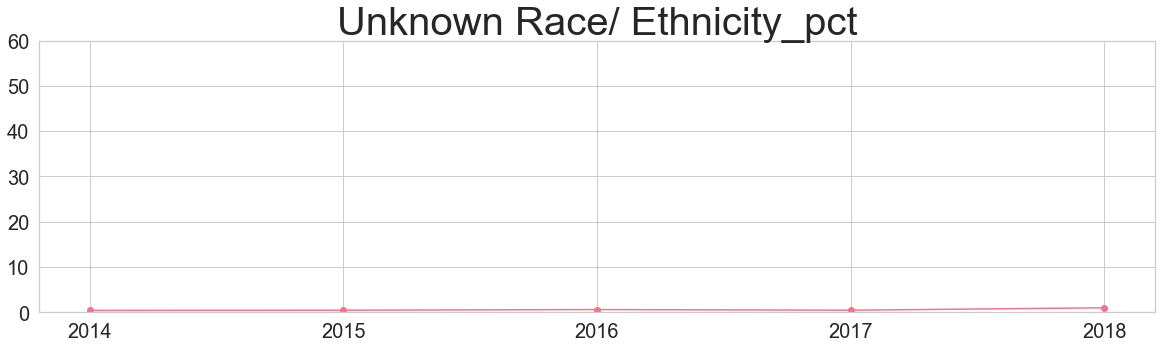

In [37]:

sns.set(style="whitegrid",palette='husl')



for c in df_race.columns[:-1]:
    plt.figure()
    plt.plot('year', c, data=df_race,marker='o')
    plt.xticks(df_race['year'].values)
    plt.yticks(range(0,70,10))
    plt.title(c)
    plt.title(c,{'fontsize': 40,'fontweight' : 1})
    plt.tick_params(labelsize=20)

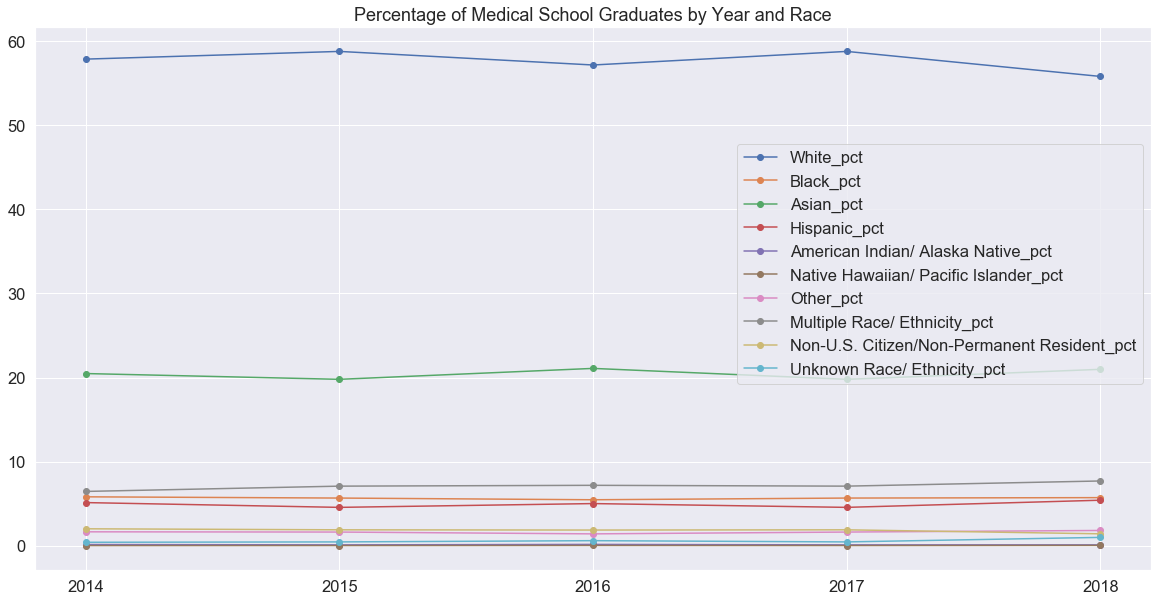

In [11]:
rcParams['figure.figsize'] = 20, 10
for c in df_race.columns[:-1]:  
    plt.plot('year', c, data=df_race,marker='o')
    plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0.3, 0.5, 0.5))
    plt.xticks(df_race['year'].values)
    plt.title('Percentage of Medical School Graduates by Year and Race')
plt.savefig("graduates.pdf")

In [12]:
#save dataframe to try and merge with residents

In [13]:
for c in df.columns:
    df=df.rename(columns={c:f'{c}_grads'})

In [14]:
df=df.reset_index()

In [15]:
df=df.rename(columns={'index':'year'})

In [16]:
df.head()

,year,White_grads,Black_grads,Asian_grads,Hispanic_grads,American Indian/ Alaska Native_grads,Native Hawaiian/ Pacific Islander_grads,Other_grads,Multiple Race/ Ethnicity_grads,Non-U.S. Citizen/Non-Permanent Resident_grads,...,White_pct_grads,Black_pct_grads,Asian_pct_grads,Hispanic_pct_grads,American Indian/ Alaska Native_pct_grads,Native Hawaiian/ Pacific Islander_pct_grads,Other_pct_grads,Multiple Race/ Ethnicity_pct_grads,Non-U.S. Citizen/Non-Permanent Resident_pct_grads,Unknown Race/ Ethnicity_pct_grads
0,2014,10458.0,1052.0,3701.0,928.0,27.0,4.0,300.0,1168.0,365.0,...,57.849320,5.819228,20.472397,5.133311,0.149353,0.022126,1.659476,6.460892,2.019029,0.414869
1,2015,10992.0,1061.0,3701.0,854.0,20.0,5.0,305.0,1326.0,355.0,...,58.765036,5.672280,19.786153,4.565624,0.106923,0.026731,1.630580,7.089014,1.897888,0.459770
2,2016,10823.0,1036.0,3993.0,950.0,31.0,7.0,268.0,1361.0,354.0,...,57.149646,5.470483,21.084592,5.016369,0.163692,0.036963,1.415144,7.186609,1.869258,0.607245
3,2017,10992.0,1061.0,3701.0,854.0,20.0,5.0,305.0,1326.0,355.0,...,58.765036,5.672280,19.786153,4.565624,0.106923,0.026731,1.630580,7.089014,1.897888,0.459770
4,2018,10909.0,1119.0,4101.0,1059.0,21.0,9.0,356.0,1506.0,278.0,...,55.791950,5.722907,20.973764,5.416049,0.107400,0.046029,1.820692,7.702143,1.421777,0.997289


In [17]:
df.to_csv('grads_cleaned.csv',index=False)